In [26]:
import pandas as pd
import numpy as np
import seaborn as sns


In [48]:
data = pd.read_csv ('/work/Circuit.csv')
data

,date,promotion_name,promoPosition,pagetype,contentgroup_1,contentgroup_2,views,clicks,position,CTR,Type
0,2022-07-14,Réservez Primo Hiver 2022-23,Home Cir - meilleurs offres grande-1,HomePage,Home,Circuit,837,38,1,4.54,Promotions
1,2022-07-14,Circuits Nouvelles Frontières|Pour vos envies ...,Home Cir - meilleurs offres grande-2,HomePage,Home,Circuit,837,42,2,5.02,Autre
2,2022-07-13,Circuits Nouvelles Frontières|Pour vos envies ...,Home Cir - meilleurs offres grande-2,HomePage,Home,Circuit,783,29,2,3.70,Autre
3,2022-07-13,Réservez Primo Hiver 2022-23,Home Cir - meilleurs offres grande-1,HomePage,Home,Circuit,785,22,1,2.80,Promotions
4,2022-07-12,Réservez Primo Hiver 2022-23,Home Cir - meilleurs offres grande-1,HomePage,Home,Circuit,950,30,1,3.16,Promotions
...,...,...,...,...,...,...,...,...,...,...,...
851,2021-07-02,Réservez Primo Hiver,Home Cir - meilleurs offres grande-1,HomePage,Home,Circuit,611,31,1,5.07,Promotions
852,2021-07-01,Nos Autotours|Partez en vacances en toute libe...,Home Cir - meilleurs offres grande-2,HomePage,Home,Circuit,903,28,2,3.10,Autre
853,2021-07-01,Réservez Primo Hiver,Home Cir - meilleurs offres grande-1,HomePage,Home,Circuit,506,36,1,7.11,Promotions
854,2021-07-01,Ouverture des ventes|Nos Circuits Best-sellers...,Home Cir - meilleurs offres grande-1,HomePage,Home,Circuit,397,33,1,8.31,Autre


In [49]:
data['position'] = data['position'].replace({1:'position1',2:'position2',3:'position3',4:'Position4',5:'position5',6:'position6'})



In [29]:
data['Type'].unique()

array(['Promotions', 'Autre', 'Crazy', 'Bons Plans', 'Vente flash'],
      dtype=object)

In [50]:
data=data.drop(columns=['promotion_name','pagetype','contentgroup_1','contentgroup_2','views','clicks'])
data

,date,promoPosition,position,CTR,Type
0,2022-07-14,Home Cir - meilleurs offres grande-1,position1,4.54,Promotions
1,2022-07-14,Home Cir - meilleurs offres grande-2,position2,5.02,Autre
2,2022-07-13,Home Cir - meilleurs offres grande-2,position2,3.70,Autre
3,2022-07-13,Home Cir - meilleurs offres grande-1,position1,2.80,Promotions
4,2022-07-12,Home Cir - meilleurs offres grande-1,position1,3.16,Promotions
...,...,...,...,...,...
851,2021-07-02,Home Cir - meilleurs offres grande-1,position1,5.07,Promotions
852,2021-07-01,Home Cir - meilleurs offres grande-2,position2,3.10,Autre
853,2021-07-01,Home Cir - meilleurs offres grande-1,position1,7.11,Promotions
854,2021-07-01,Home Cir - meilleurs offres grande-1,position1,8.31,Autre


In [51]:
data['log_CTR']=data['CTR'].apply(lambda x : np.log(x))
data

,date,promoPosition,position,CTR,Type,log_CTR
0,2022-07-14,Home Cir - meilleurs offres grande-1,position1,4.54,Promotions,1.512927
1,2022-07-14,Home Cir - meilleurs offres grande-2,position2,5.02,Autre,1.613430
2,2022-07-13,Home Cir - meilleurs offres grande-2,position2,3.70,Autre,1.308333
3,2022-07-13,Home Cir - meilleurs offres grande-1,position1,2.80,Promotions,1.029619
4,2022-07-12,Home Cir - meilleurs offres grande-1,position1,3.16,Promotions,1.150572
...,...,...,...,...,...,...
851,2021-07-02,Home Cir - meilleurs offres grande-1,position1,5.07,Promotions,1.623341
852,2021-07-01,Home Cir - meilleurs offres grande-2,position2,3.10,Autre,1.131402
853,2021-07-01,Home Cir - meilleurs offres grande-1,position1,7.11,Promotions,1.961502
854,2021-07-01,Home Cir - meilleurs offres grande-1,position1,8.31,Autre,2.117460


In [ ]:
data['promoPosition'].value_counts()


Home CM – bonnes affaires grandes-1    422
Home CM – bonnes affaires grandes-2    413
Home CM – bonnes affaires petites-3    381
Bon Plan-1                             193
Bon Plan-2                             186
Bon Plan-3                             151
Home CM – bonnes affaires petites-4    123
Home CM – bonnes affaires petites-5     90
Bon Plan-6                              58
Bon Plan-4                              51
Bon Plan-5                              45
Home CM – bonnes affaires petites-2      2
Name: promoPosition, dtype: int64

In [52]:
#feature engineering
data.date=pd.to_datetime(data.date,errors='coerce')
data['jour']=data.date.dt.day_name()
data['mois']=data.date.dt.month_name()
data=data.rename(columns={'Type':'type_banniere'})
data

,date,promoPosition,position,CTR,type_banniere,log_CTR,jour,mois
0,2022-07-14,Home Cir - meilleurs offres grande-1,position1,4.54,Promotions,1.512927,Thursday,July
1,2022-07-14,Home Cir - meilleurs offres grande-2,position2,5.02,Autre,1.613430,Thursday,July
2,2022-07-13,Home Cir - meilleurs offres grande-2,position2,3.70,Autre,1.308333,Wednesday,July
3,2022-07-13,Home Cir - meilleurs offres grande-1,position1,2.80,Promotions,1.029619,Wednesday,July
4,2022-07-12,Home Cir - meilleurs offres grande-1,position1,3.16,Promotions,1.150572,Tuesday,July
...,...,...,...,...,...,...,...,...
851,2021-07-02,Home Cir - meilleurs offres grande-1,position1,5.07,Promotions,1.623341,Friday,July
852,2021-07-01,Home Cir - meilleurs offres grande-2,position2,3.10,Autre,1.131402,Thursday,July
853,2021-07-01,Home Cir - meilleurs offres grande-1,position1,7.11,Promotions,1.961502,Thursday,July
854,2021-07-01,Home Cir - meilleurs offres grande-1,position1,8.31,Autre,2.117460,Thursday,July


In [33]:
import matplotlib.pyplot as plt

<AxesSubplot:xlabel='type_banniere', ylabel='CTR'>

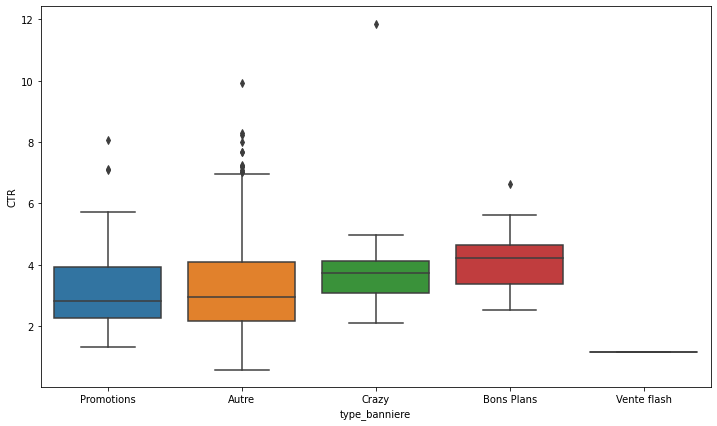

In [53]:
plt.figure(figsize=(12,7))
sns.boxplot(y='CTR',x='type_banniere',data=data)

<AxesSubplot:xlabel='jour', ylabel='CTR'>

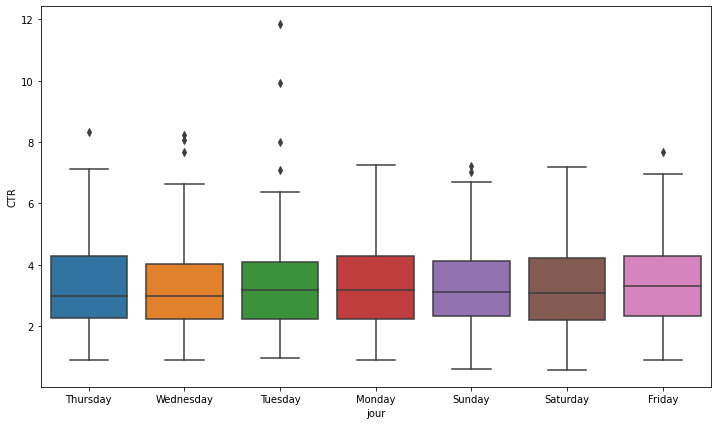

In [35]:
plt.figure(figsize=(12,7))
sns.boxplot(y='CTR',x='jour',data=data)

<AxesSubplot:xlabel='mois', ylabel='CTR'>

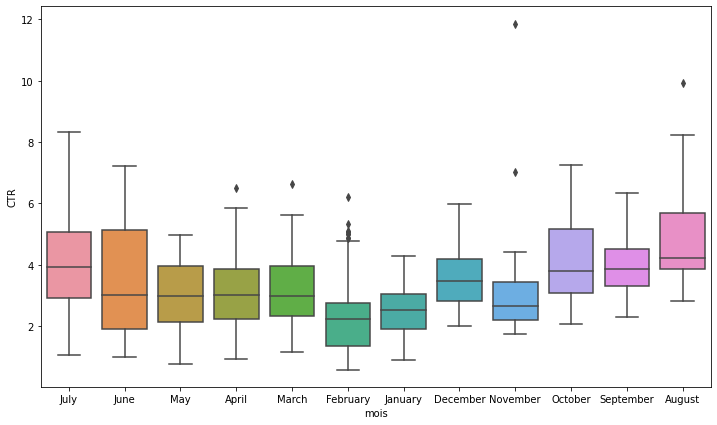

In [36]:
plt.figure(figsize=(12,7))
sns.boxplot(y='CTR',x='mois',data=data)

<AxesSubplot:xlabel='position', ylabel='CTR'>

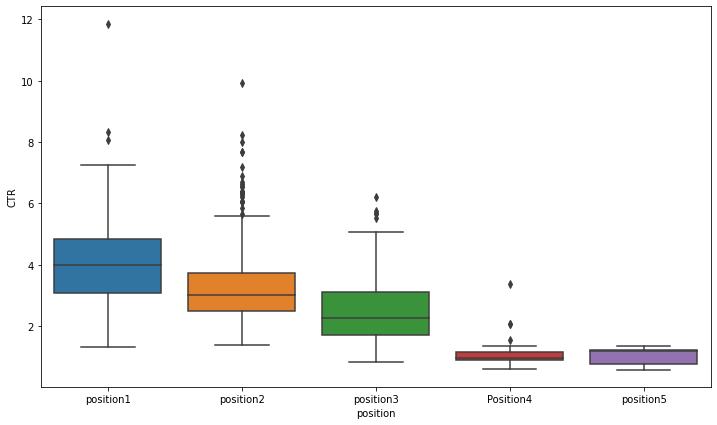

In [37]:
plt.figure(figsize=(12,7))
sns.boxplot(y='CTR',x='position',data=data)

In [38]:
data=data.drop(columns=['date','promoPosition'])


In [39]:
data


,position,CTR,type_banniere,log_CTR,jour,mois
0,position1,4.54,Promotions,1.512927,Thursday,July
1,position2,5.02,Autre,1.613430,Thursday,July
2,position2,3.70,Autre,1.308333,Wednesday,July
3,position1,2.80,Promotions,1.029619,Wednesday,July
4,position1,3.16,Promotions,1.150572,Tuesday,July
...,...,...,...,...,...,...
851,position1,5.07,Promotions,1.623341,Friday,July
852,position2,3.10,Autre,1.131402,Thursday,July
853,position1,7.11,Promotions,1.961502,Thursday,July
854,position1,8.31,Autre,2.117460,Thursday,July


In [41]:
data.isna().sum()

position         0
CTR              0
type_banniere    0
log_CTR          0
jour             0
mois             0
dtype: int64

In [54]:
list_features=['position','type_banniere', 'mois']
X_cat = pd.get_dummies(data[list_features],drop_first = 1)
X_cat

,position_position1,position_position2,position_position3,position_position5,type_banniere_Bons Plans,type_banniere_Crazy,type_banniere_Promotions,type_banniere_Vente flash,mois_August,mois_December,mois_February,mois_January,mois_July,mois_June,mois_March,mois_May,mois_November,mois_October,mois_September
0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
4,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
851,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
852,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
853,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
854,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [79]:

datafs=pd.concat([X_cat,data['log_CTR']], axis=1)

datafs

,position1,position2,position3,position5,Bons plan,Crazy,Promotions,type_banniere_Vente flash,August,December,February,January,July,June,March,May,November,October,September,log_CTR
0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1.512927
1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1.613430
2,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1.308333
3,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1.029619
4,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1.150572
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
851,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1.623341
852,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1.131402
853,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1.961502
854,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,2.117460


In [80]:
X_cat=X_cat.rename(columns={
#'promoPosition_Bon Plan-1':'bon_plan1',
#'promoPosition_Bon Plan-2':'bon_plan2',
#'promoPosition_Bon Plan-3':'bon_plan3',
#'promoPosition_Bon Plan-4':'bon_plan4',
#'promoPosition_Bon Plan-5':'bon_plan5',
#'promoPosition_Bon Plan-6':'bon_plan6',

#'promoPosition_Home CM – bonnes affaires grandes-1':'CM–bon_affai_grandes-1',
#'promoPosition_Home CM – bonnes affaires grandes-2':'CM–bon_affai_grandes-2',
#'promoPosition_Home CM – bonnes affaires petites-2':'CM–bon_affai_petites-2',
#'promoPosition_Home CM – bonnes affaires petites-3':'CM–bon_affai_petites-3',
#'promoPosition_Home CM – bonnes affaires petites-4':'CM–bon_affai_petites-4',
#'promoPosition_Home CM – bonnes affaires petites-5':'CM–bon_affai_petites-5',
'position_position1':'position1',
'position_position2':'position2',
'position_position3':'position3',
'position_position4':'position4',
'position_position5':'position5',
'position_position6':'position6',

'type_banniere_Autre':'Autre',
'type_banniere_Bons Plans':'Bons plan',
'type_banniere_Crazy':'Crazy',
'type_banniere_Foliday':'Foliday',
'type_banniere_Promotions':'Promotions',
'type_banniere_Sejour tout compris':'Sejour tout compris',

'jour_Friday':'Friday',
'jour_Monday':'Monday',
'jour_Saturday':'Saturday',
'jour_Sunday':'Sunday',
'jour_Thursday':'Thursday',
'jour_Tuesday':'Tuesday',
'jour_Wednesday':'Wednesday',
'mois_April':'April',
'mois_August':'August',
'mois_December':'December',
'mois_February':'February',
'mois_January':'January',
'mois_July':'July',
'mois_June':'June',
'mois_March':'March',
'mois_May':'May',
'mois_November':'November',
'mois_October':'October',
'mois_September':'September'})

In [81]:
x=X_cat
x


,position1,position2,position3,position5,Bons plan,Crazy,Promotions,type_banniere_Vente flash,August,December,February,January,July,June,March,May,November,October,September
0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
4,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
851,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
852,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
853,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
854,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [83]:
X_train=X.loc[data.date<='2022-07-01']
y_train= y.loc[data.date<='2022-07-01']

X_test = X.loc[data.date>'2022-07-01']
y_test = y.loc[data.date>'2022-07-01']

# transform target variables
from sklearn.preprocessing import MinMaxScaler
target_scaler = MinMaxScaler()


print("X_train shape :", X_train.shape)
print("X_test shape :", X_test.shape)
print("y_train shape :", y_train.shape)
print("y_test shape :", y_test.shape)

X_train shape : (828, 19)
X_test shape : (28, 19)
y_train shape : (828,)
y_test shape : (28,)


# Other transformation

In [82]:
# define the target transform wrapper   datafs
from sklearn.compose import TransformedTargetRegressor

# example of normalizing input and output variables for regression.
from numpy import mean
from numpy import absolute
from numpy import loadtxt
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.linear_model import HuberRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import TransformedTargetRegressor
# load data
dataset = datafs
# split into inputs and outputs
X, y = dataset.iloc[:, :-1], dataset.iloc[:, -1]
y=y.fillna(2.37)
# prepare the model with input scaling
pipeline = Pipeline(steps=[('normalize', MinMaxScaler()), ('model', HuberRegressor())])
# prepare the model with target scaling
model = TransformedTargetRegressor(regressor=pipeline, transformer=MinMaxScaler())
# evaluate model
cv = KFold(n_splits=10, shuffle=True, random_state=1)
scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# convert scores to positive
scores = absolute(scores)
# summarize the result
s_mean = mean(scores)
print('Mean MAE: %.3f' % (s_mean))

Mean MAE: 0.222


In [60]:
!pip install statsmodels==0.13.2


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 91.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.7/233.7 KB 37.2 MB/s eta 0:00:00
You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


In [84]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [85]:
#print the intercept
print(model.intercept_)

0.09795843777859203


In [86]:
coeff_parameter = pd.DataFrame(model.coef_,x.columns,columns=['Coefficient'])
coeff_parameter

,Coefficient
position1,1.340362
position2,0.871989
position3,0.630590
position5,-0.113768
Bons plan,0.105728
Crazy,-0.120068
Promotions,-0.618054
type_banniere_Vente flash,0.147087
August,0.668058
December,0.293224


In [87]:
predictions = model.predict(X_test)
predictions

array([1.44165858, 1.59133965, 1.59133965, 1.44165858, 1.44165858,
       1.59133965, 1.44165858, 1.59133965, 1.59133965, 1.44165858,
       1.44165858, 1.59133965, 1.44165858, 1.59133965, 1.59133965,
       1.44165858, 1.59133965, 1.44165858, 1.59133965, 1.44165858,
       1.44165858, 1.59133965, 1.59133965, 1.34993978, 1.44165858,
       1.59133965, 1.44165858, 1.34993978])

/shared-libs/python3.9/py/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='log_CTR'>

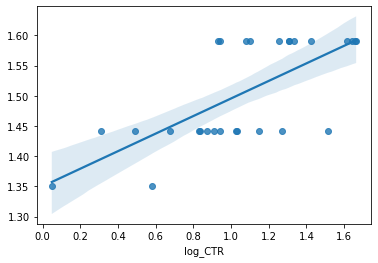

In [88]:
sns.regplot(y_test,predictions)


In [89]:
import statsmodels.api as sm
X_train_Sm= sm.add_constant(X_train)
X_train_Sm= sm.add_constant(X_train)
ls=sm.OLS(y_train,X_train_Sm).fit()
print(ls.summary())

                            OLS Regression Results                            
Dep. Variable:                log_CTR   R-squared:                       0.672
Model:                            OLS   Adj. R-squared:                  0.664
Method:                 Least Squares   F-statistic:                     87.07
Date:                Sat, 20 Aug 2022   Prob (F-statistic):          1.42e-180
Time:                        23:32:52   Log-Likelihood:                -90.365
No. Observations:                 828   AIC:                             220.7
Df Residuals:                     808   BIC:                             315.1
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [90]:
from statsmodels.stats.diagnostic import linear_rainbow

Ftest, pval = linear_rainbow(ls)

print(pval)

0.08704426077339679


# Test d'homoscidasité

In [91]:
from statsmodels.compat import lzip
import statsmodels.stats.api as sms

In [70]:
names = ['Lagrange multiplier statistic', 'p-value',
        'f-value', 'f p-value']

In [92]:
#https://www.statology.org/breusch-pagan-test-python/

from statsmodels.compat import lzip
import statsmodels.stats.api as sms

#perform Bresuch-Pagan test
names = ['Lagrange multiplier statistic', 'p-value',
        'f-value', 'f p-value']
test = sms.het_breuschpagan(ls.resid, ls.model.exog)

lzip(names, test)



[('Lagrange multiplier statistic', 54.22317319240317),
 ('p-value', 3.054424706511759e-05),
 ('f-value', 2.980073460975894),
 ('f p-value', 2.093198482878711e-05)]

### nous constatons qu'il y a une hétéroscédasticité -->ce critère n'est pas vérifier pour remédier à ce probleme nous allons Utiliser la régression pondérée

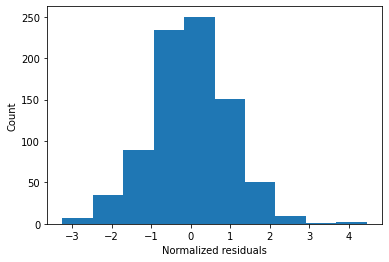

In [93]:
from math import *
residues = ls.resid_pearson
residues_std = residues/sqrt(sum(residues**2)/(len(residues)-1))
plt.hist(residues_std)

plt.ylabel('Count')

plt.xlabel('Normalized residuals')

plt.show()

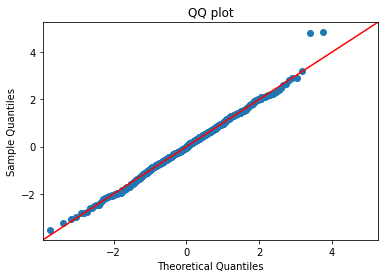

In [94]:
import scipy.stats as stats

#

fig = sm.qqplot(residues_std, stats.t, fit=True,line='45')

plt.title("QQ plot")

plt.show()

# Test de shapiro wilk

In [95]:
from scipy.stats import shapiro
stat, p = shapiro(datafs)
stat
p


/shared-libs/python3.9/py/lib/python3.9/site-packages/scipy/stats/_morestats.py:1800: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


0.0

In [96]:
from scipy.stats import jarque_bera

x, pval = jarque_bera(residues_std) ; print(pval)

3.724247001801739e-05


Nous remarquons que la normalité est vérifieé

#  Contrôler l'indépendance des résidus

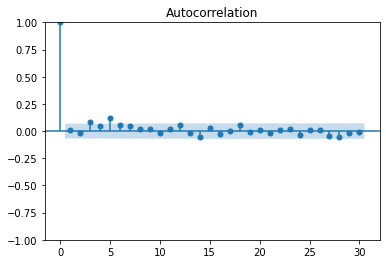

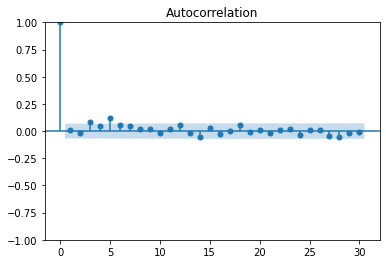

In [97]:
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(residues)

In [98]:
  from statsmodels.stats.stattools import durbin_watson

#perform Durbin-Watson test
durbin_watson(ls.resid)

1.9688755436407965

La statistique de test est  de 2,12 . Étant donné que cela se situe dans la plage de 1,5 et 2,5, nous considérons que l'autocorrélation n'est pas problématique dans ce modèle de régression.

# Évaluer les points qui ont une grande influence sur la régression afin de les écarter s'il s'agit de points potentiellement aberrants.

/root/venv/lib/python3.9/site-packages/statsmodels/stats/outliers_influence.py:696: RuntimeWarning: invalid value encountered in sqrt
  return self.resid / sigma / np.sqrt(1 - hii)


<Figure size 864x504 with 0 Axes>

posx and posy should be finite values
posx and posy should be finite values


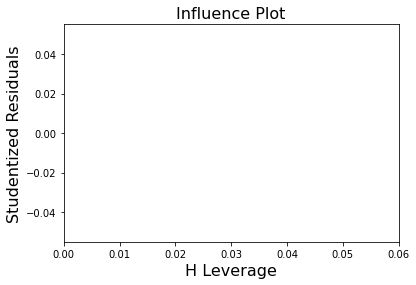

In [99]:
from statsmodels.graphics.regressionplots import *
plt.figure(figsize=(12,7))

influence_plot(ls) # myreg doit être un model de statsmodels

plt.xlim(0,0.06) # paramétrage manuel

plt.show()

In [ ]:
CODE 
#https://sites.google.com/view/aide-python/statistiques/machine-learning-en-python/r%C3%A9gressions-lin%C3%A9aires-en-python

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor


In [ ]:

# Get predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

df_results_train = pd.DataFrame({'Actual': y_train , 'Predicted': y_train_pred})
df_results_test = pd.DataFrame({'Actual': y_test , 'Predicted': y_test_pred})
# Prediction vs Actual plot
sns.lmplot(x='Actual', y='Predicted', data=df_results_train, fit_reg=False, markers = "x")
d_line= np.arange(df_results_train.min().min(), df_results_train.max().max())
plt.plot(d_line, d_line, color='green', linestyle='--')
plt.show()

# Show Metrics
print(f"MAE {mean_absolute_error(y_train, y_train_pred)}")
print(f"MAPE {mean_absolute_percentage_error(y_train, y_train_pred)}")
print(f"MSE :  {mean_squared_error(y_train, y_train_pred)}")

NameError: name 'model' is not defined

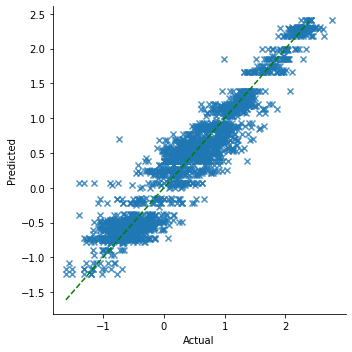

MAE 0.20464799030842556
MAPE 5168811435868.321
MSE :  0.07161249569941197


In [ ]:
reg = RandomForestRegressor()
reg.fit(X_train, y_train)

# Get predictions
y_train_pred = reg.predict(X_train)
y_test_pred = reg.predict(X_test)

df_results_train = pd.DataFrame({'Actual': y_train , 'Predicted': y_train_pred})
df_results_test = pd.DataFrame({'Actual': y_test , 'Predicted': y_test_pred})
# Prediction vs Actual plot
sns.lmplot(x='Actual', y='Predicted', data=df_results_train, fit_reg=False, markers = "x")
d_line= np.arange(df_results_train.min().min(), df_results_train.max().max())
plt.plot(d_line, d_line, color='green', linestyle='--')
plt.show()

# Show Metrics
print(f"MAE {mean_absolute_error(y_train, y_train_pred)}")
print(f"MAPE {mean_absolute_percentage_error(y_train, y_train_pred)}")
print(f"MSE :  {mean_squared_error(y_train, y_train_pred)}")


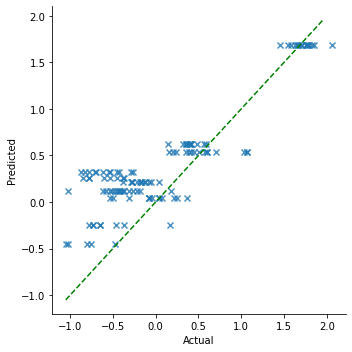

MAE 0.20464799030842556
MAPE 5168811435868.321
MSE :  0.07161249569941197


In [ ]:
# with position MSE :  0.29
# Prediction vs Actual plot
sns.lmplot(x='Actual', y='Predicted', data=df_results_test, fit_reg=False, markers = "x")
d_line= np.arange(df_results_test.min().min(), df_results_test.max().max())
plt.plot(d_line, d_line, color='green', linestyle='--')
plt.show()

# Show Metrics
print(f"MAE {mean_absolute_error(y_train, y_train_pred)}")
print(f"MAPE {mean_absolute_percentage_error(y_train, y_train_pred)}")
print(f"MSE :  {mean_squared_error(y_train, y_train_pred)}")

<BarContainer object of 27 artists>

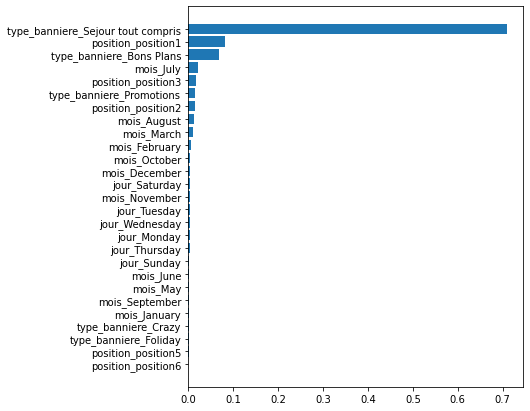

In [ ]:
plt.figure(figsize = (6,7))
importances = pd.DataFrame({"features" : X_train.columns,
                            "importance" : reg.feature_importances_}).sort_values("importance")

plt.barh(importances.features, importances.importance)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=17c78468-df45-44b7-9d10-8043693c30e4' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>